In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv("train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
test = pd.read_csv("test.csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
#print datatypes for each variables

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

shape of the dataset.

In [11]:
train.shape

(614, 13)

In [12]:
test.shape

(367, 12)

In [13]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
train.drop_duplicates(keep=False)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
print(train.describe(include=[object]))

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  


In [18]:
"""
    Univariate Analysis it Includes(A)Central Tendency (B)Measure of dispersion (C)visualizing method
"""
# summary of numerical data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
# frequency analysis
pa=train['Property_Area'].value_counts()
pa

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<Axes: title={'center': 'Applicants by Proeprty Area'}, xlabel='Property_Area', ylabel='Count of Applicants'>

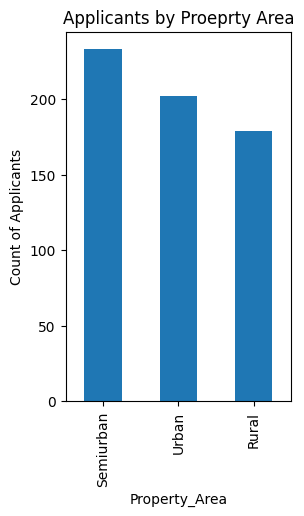

In [20]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Property_Area')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Proeprty Area")
pa.plot(kind='bar')

In [21]:
gen=train['Gender'].value_counts()
gen

Male      489
Female    112
Name: Gender, dtype: int64

<Axes: title={'center': 'Applicants by Gender'}, xlabel='Gender', ylabel='Count of Applicants'>

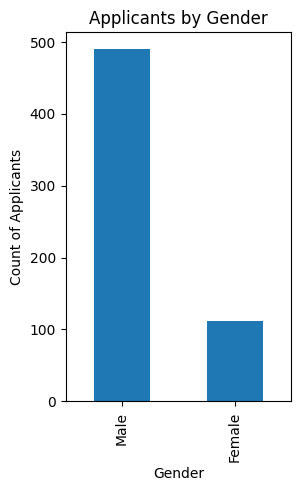

In [22]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Gender")
gen.plot(kind='bar')

In [23]:
ma=train['Married'].value_counts()
ma

Yes    398
No     213
Name: Married, dtype: int64

<Axes: title={'center': 'Applicants by Married'}, xlabel='Married', ylabel='Count of Applicants'>

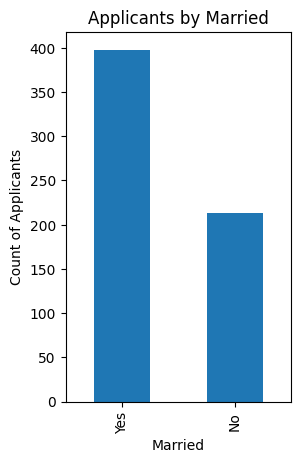

In [24]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Married")
ma.plot(kind='bar')

In [25]:
dep=train['Dependents'].value_counts()  
dep

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<Axes: title={'center': 'Applicants by Dependents'}, xlabel='Dependent', ylabel='Count of Applicants'>

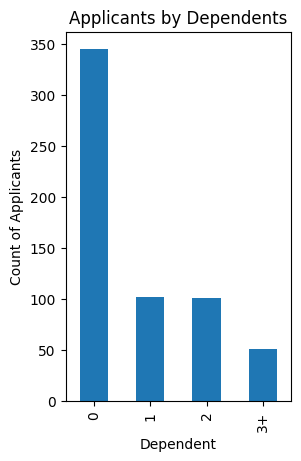

In [26]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Dependent')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Dependents")
dep.plot(kind='bar')

In [27]:
edu=train['Education'].value_counts()
edu

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<Axes: title={'center': 'Applicants by Education'}, xlabel='Education', ylabel='Count of Applicants'>

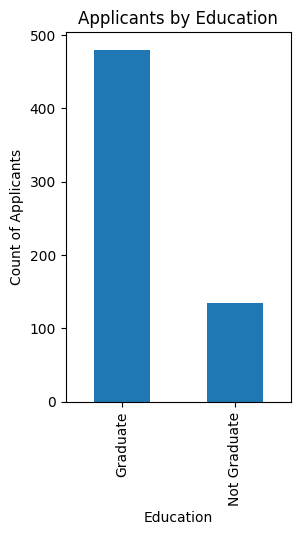

In [28]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
edu.plot(kind='bar')

In [29]:
se=train['Self_Employed'].value_counts()
se

No     500
Yes     82
Name: Self_Employed, dtype: int64

<Axes: title={'center': 'Applicants by Self Employed'}, xlabel='Self Employed', ylabel='Count of Applicants'>

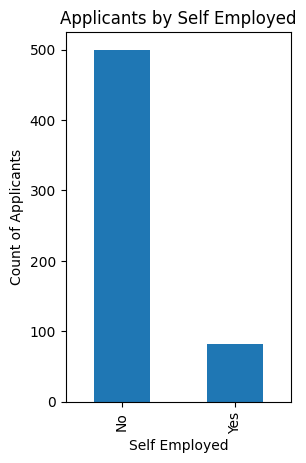

In [30]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self Employed')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Self Employed")
se.plot(kind='bar')

In [31]:
ch=train['Credit_History'].value_counts()
ch

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: title={'center': 'Applicants by Credit History'}, xlabel='Credit History', ylabel='Count of Applicants'>

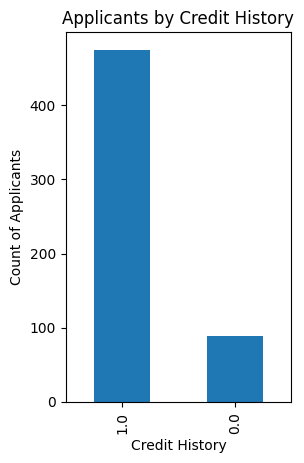

In [32]:
#plotting of Frequency analysis of property area
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
ch.plot(kind='bar')

In [33]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [34]:
# Normalize can be set to True to print proportions  instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

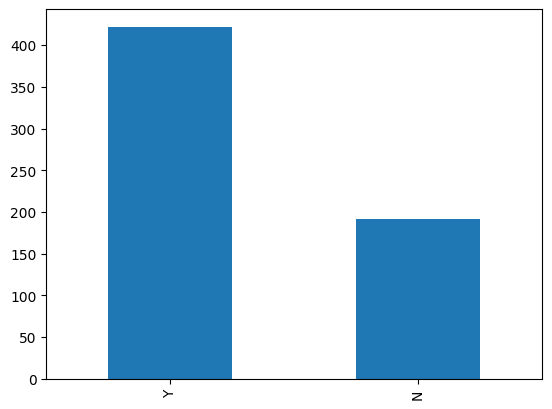

In [35]:
train['Loan_Status'].value_counts().plot.bar()

In [36]:
# variance
train['LoanAmount'].var()
train['ApplicantIncome'].var()
train['CoapplicantIncome'].var()
train['Loan_Amount_Term'].var()
train['Credit_History'].var()
train.skew()


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\3970637531.py:7: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

422(around 69%) people out of 614 got the approval.


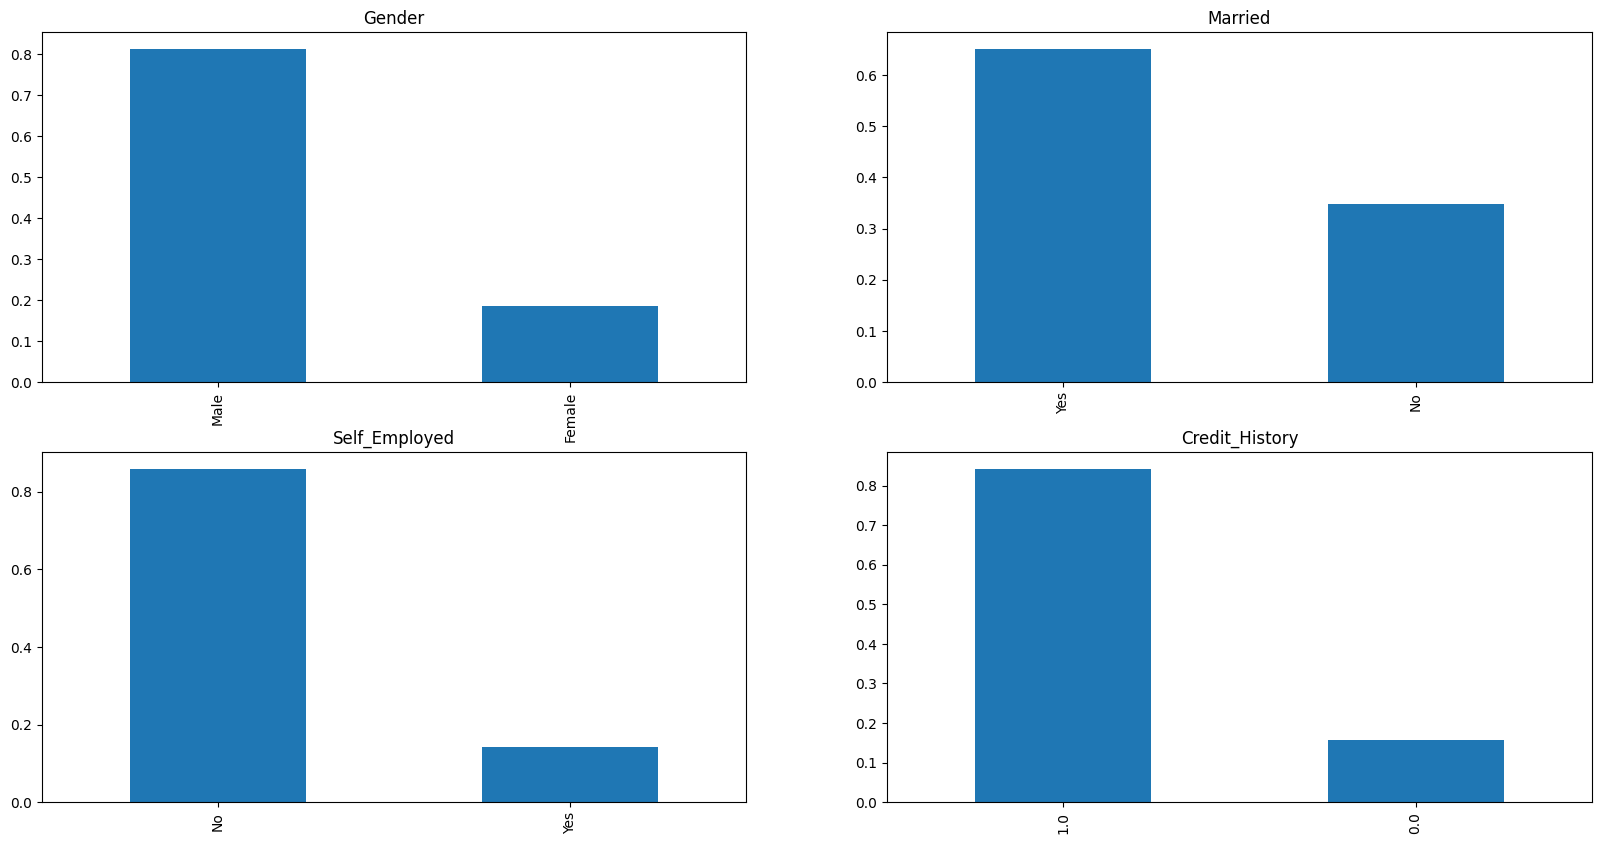

In [37]:
#Independent Variable (Categorical)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

80% of the applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
About 15% of applicants in the dataset are self employed.
About 85% of applicants have  ewoaid thier debts.

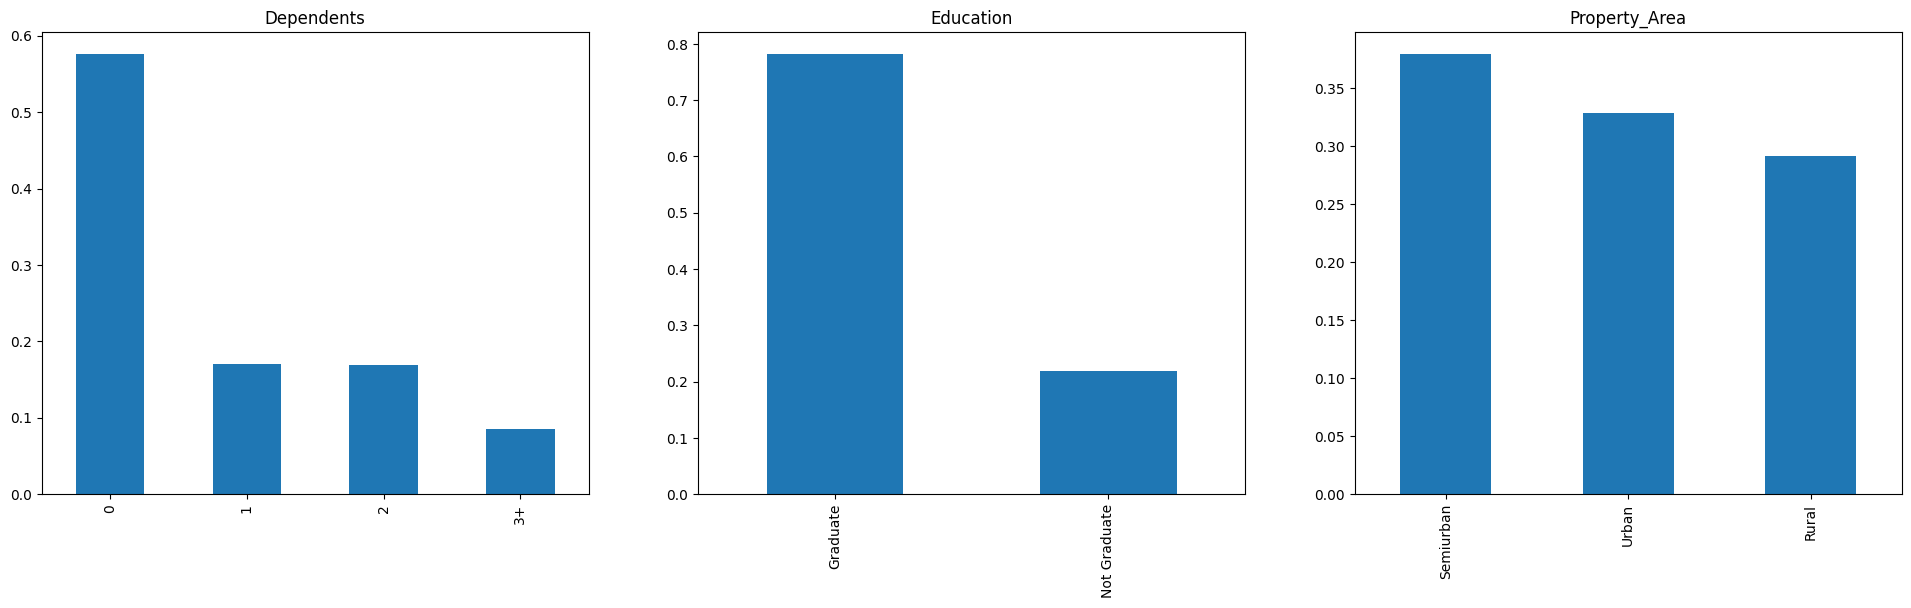

In [38]:
#Independent Variable (Ordinal)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Most of the applicants don't have dependents. And about 80% of the applicants are graduates and most of the applicants are from semi-urban areas.

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\1656811033.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


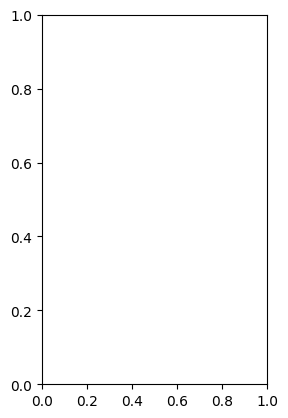

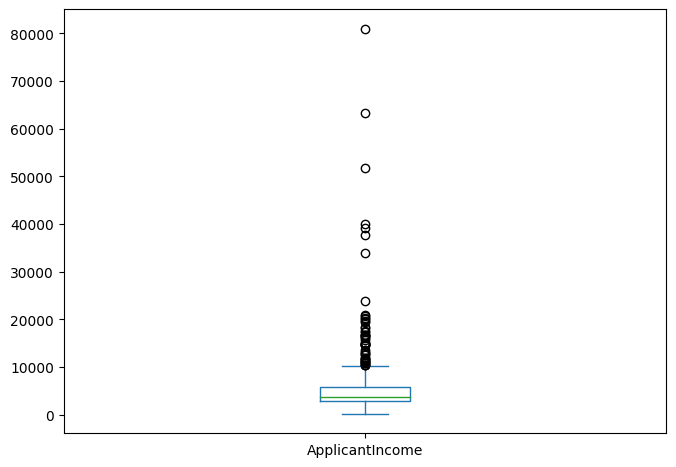

In [39]:
#Independent Variable (Numerical)
plt.subplot(121)
sns.displot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\2163648937.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount']);


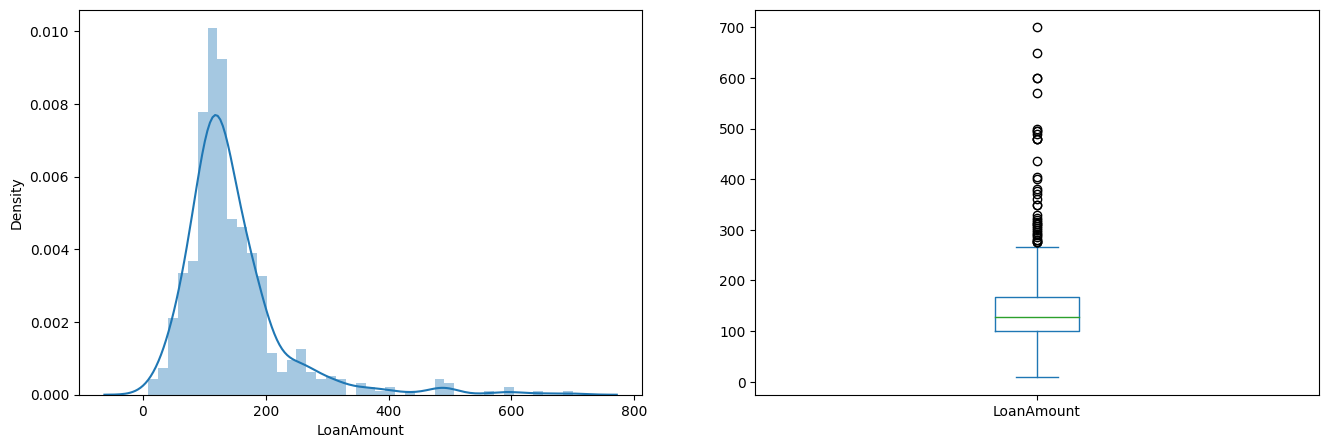

In [40]:
#look at the distribution of the LoanAmount variable.
plt.subplot(121)
df=train.dropna() 
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [41]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


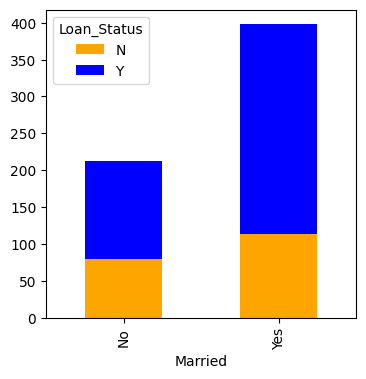

In [42]:
Married.plot(kind="bar", stacked= True, color = ['Orange', 'blue'], figsize=(4,4)) 
plt.show()

The proportion of married applicants is higher for the approved loans

In [43]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents


Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


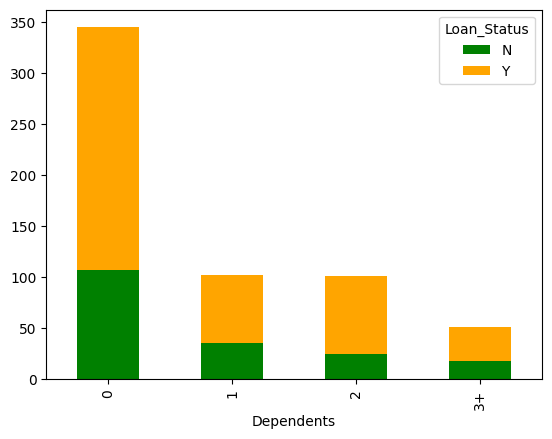

In [44]:
Dependents.plot(kind="bar", stacked=True, color=['green', 'orange'])
plt.show()

The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

In [45]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


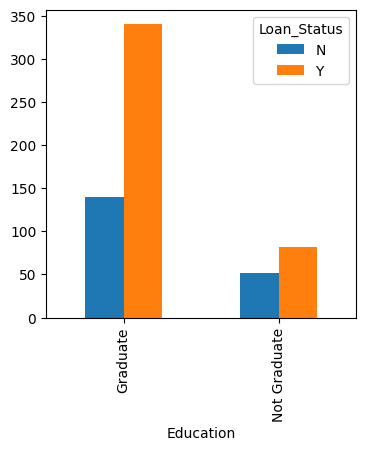

In [46]:
Education.plot(kind="bar", figsize=(4,4)) 
plt.show()

In [47]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


There is nothing significant we can infer from Self_Employed vs Loan_Status plot

 We will look at the relationship between the remaining categorical independent variables and Loan_Status.

In [48]:
Credit_History= pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


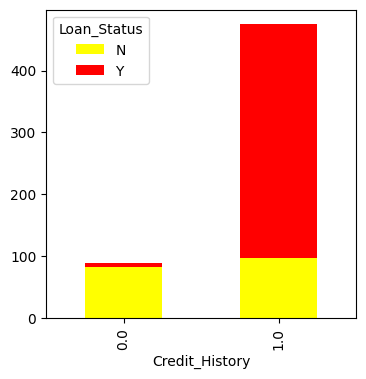

In [49]:
Credit_History.plot(kind="bar", stacked=True,  color= ['yellow', 'red'], figsize=(4,4)) 
plt.show()

In [50]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


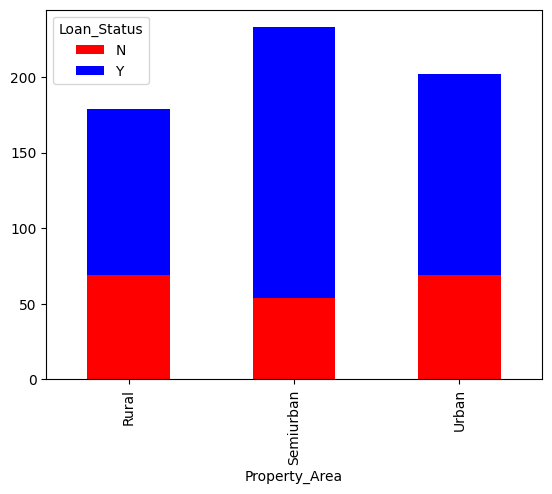

In [51]:
Property_Area.plot(kind="bar", stacked=True, color = ['red', 'blue']) 
plt.show()

In [52]:
gender = pd.crosstab(train['Gender'], train['Loan_Status'])
print(gender)

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Axes: xlabel='Gender'>

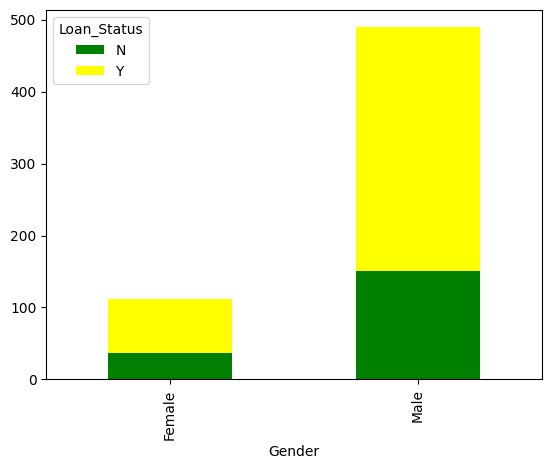

In [53]:
gender.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)


It seems people with a credit history of 1 are more likely to get their loans approved.

The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

<Axes: xlabel='Loan_Status'>

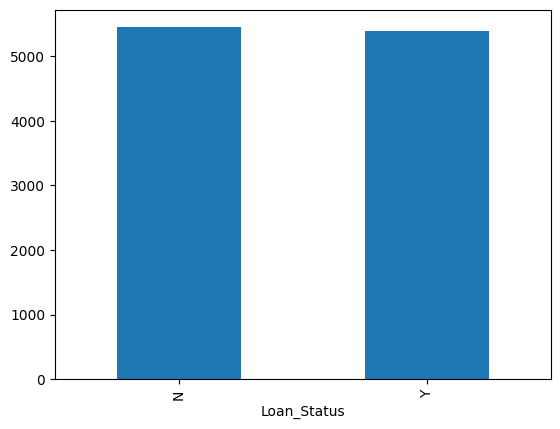

In [54]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


In [55]:
impute_grps = train.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"])
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556

<Axes: xlabel='Loan_Status'>

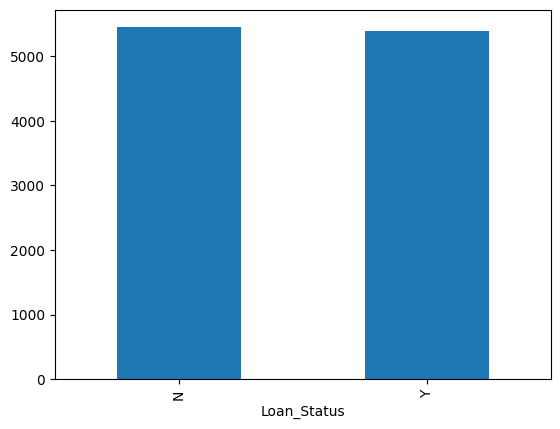

In [56]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


<Axes: xlabel='Loan_Status'>

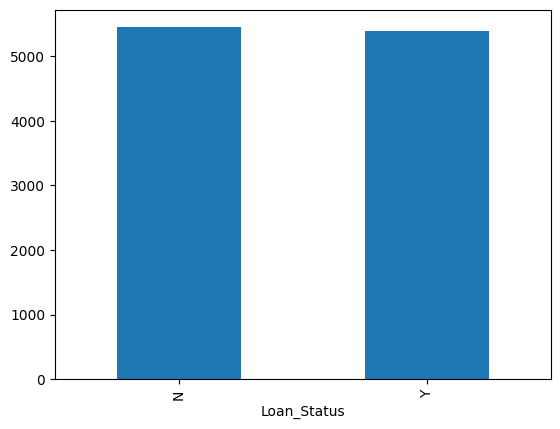

In [57]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


In [58]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)


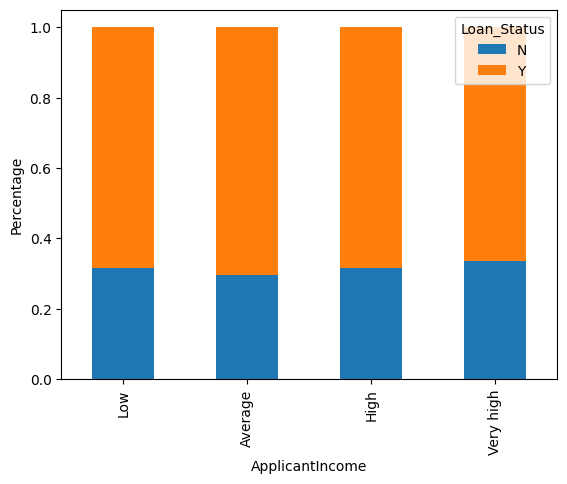

In [59]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

There be can see that applicants income does not affect the chances of laon approval which contradicts our hypothesis in we assusemd that if the applicants income is high the chances of laon approval will also be high

now ananlyze th applicants income and loan amount variable in a similar manner.

In [60]:
bins =[0, 1000, 3000, 42000]
group=["low", 'average', 'high']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

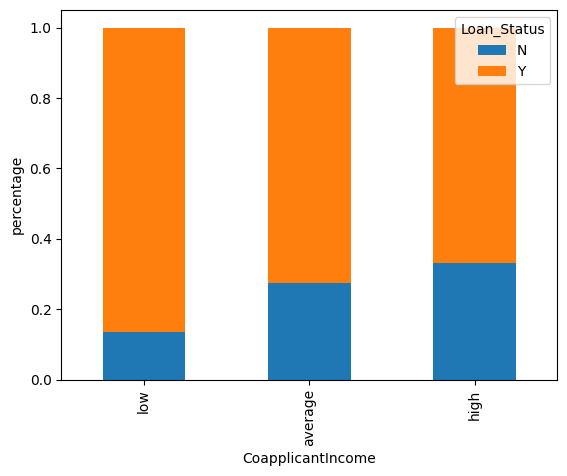

In [61]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
p = plt.ylabel('percentage')

we can see that the chances of loan approval will be high when the loan amount is less

In [62]:
train['Dependents'].replace('3+', 3,inplace=True) 
train['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

In [63]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN


Correlation between all the numerical varaibels.Will use the heat map to visualize the correlation
Heartmaps visualize data through variations in coloring. The variables with darker colors means thier correlation is more.

In [64]:
matrix=train.corr()
matrix

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\649993992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=train.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

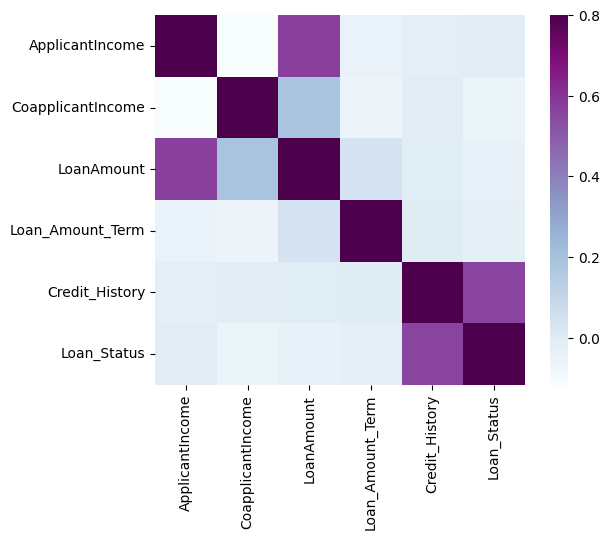

In [65]:
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu')

In [66]:
# Missing vaalue and outlter 

In [67]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
dtype: int64

In [68]:
#Here we can fill them using the mode of features 
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [69]:
#value count of the Loan_Amount_term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [70]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [71]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
dtype: int64

In [72]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

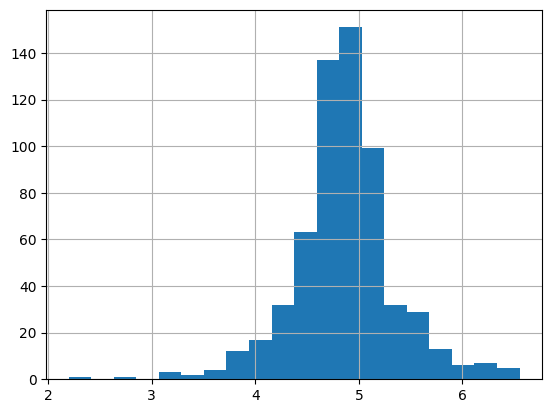

In [73]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [74]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [75]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\584244836.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('Loan_Status',1)


In [76]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [77]:
train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high,Coapplicant_Income_bin_low,Coapplicant_Income_bin_average,Coapplicant_Income_bin_high
0,5849,0.0,128.0,360.0,1.0,1,4.852030,0,1,1,...,0,0,1,0,0,1,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,1,4.189655,0,1,0,...,0,0,1,0,1,0,0,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,0,1,0,...,0,0,1,0,1,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,4.948760,0,1,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,4.262680,1,0,1,...,1,0,0,0,1,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,3.688879,0,1,0,...,1,0,0,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,5.533389,0,1,0,...,0,0,1,0,0,0,1,1,0,0
612,7583,0.0,187.0,360.0,1.0,1,5.231109,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [79]:
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred=model.predict(x_cv)


In [81]:
pred_cv = model.predict(x_cv)


In [82]:
accuracy_score(y_cv,pred_cv)

0.7621621621621621

In [83]:
from sklearn.model_selection import StratifiedKFold


In [84]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):
     print('n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.iloc[train_index],X.iloc[test_index]
     ytr,yvl = y.iloc[train_index],y.iloc[test_index]
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1

C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


n1 of kfold 5
accuracy_score 0.7967479674796748
n2 of kfold 5
accuracy_score 0.8373983739837398
n3 of kfold 5
accuracy_score 0.7804878048780488
n4 of kfold 5
accuracy_score 0.7886178861788617
n5 of kfold 5
accuracy_score 0.7950819672131147


C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Satyam Mishra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Feature Engineering

In [85]:
train['Total_income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income']=test['ApplicantIncome']+test['CoapplicantIncome']

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\1709781698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Total_income)


<Axes: xlabel='Total_income', ylabel='Density'>

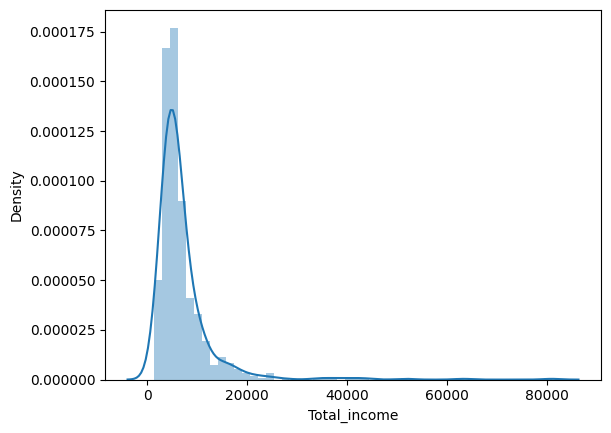

In [86]:
sns.distplot(train.Total_income)

In [87]:
train['Total_income_log']=np.log(train['Total_income'])


C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\3659210235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Total_income_log'])


<Axes: xlabel='Total_income_log', ylabel='Density'>

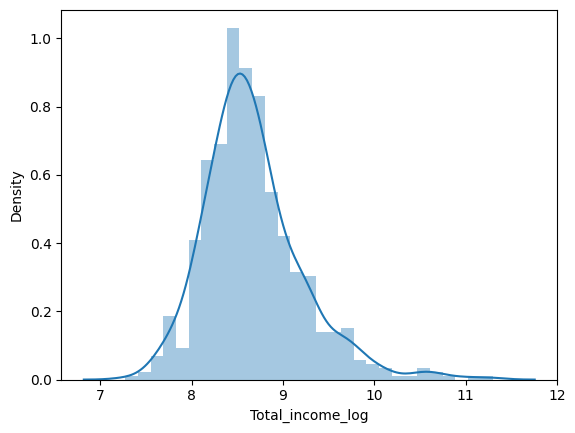

In [88]:
sns.distplot(train['Total_income_log'])

In [89]:
test['Total_income_log']=np.log(test['Total_income'])


In [90]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\2106971398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.EMI)


<Axes: xlabel='EMI', ylabel='Density'>

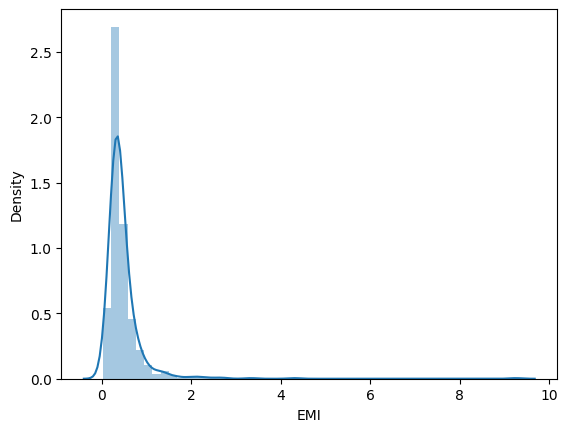

In [91]:
sns.distplot(train.EMI)

In [92]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [93]:
train

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Income_bin_Low,Income_bin_Average,Income_bin_High,Income_bin_Very high,Coapplicant_Income_bin_low,Coapplicant_Income_bin_average,Coapplicant_Income_bin_high,Total_income,Total_income_log,EMI
0,1.0,1,4.852030,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,5849.0,8.674026,0.355556
1,1.0,0,4.852030,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,6091.0,8.714568,0.355556
2,1.0,1,4.189655,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,3000.0,8.006368,0.183333
3,1.0,1,4.787492,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,4941.0,8.505323,0.333333
4,1.0,1,4.948760,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,6000.0,8.699515,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,1,4.262680,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,2900.0,7.972466,0.197222
610,1.0,1,3.688879,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,4106.0,8.320205,0.222222
611,1.0,1,5.533389,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,8312.0,9.025456,0.702778
612,1.0,1,5.231109,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,7583.0,8.933664,0.519444


In [99]:
train['Balance_Income']=train['Total_income']-(train['EMI']*1000)
test['Balance_Income']=test['Total_income']-(test['EMI']*1000)

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\219860664.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Balance_Income)


<Axes: xlabel='Balance_Income', ylabel='Density'>

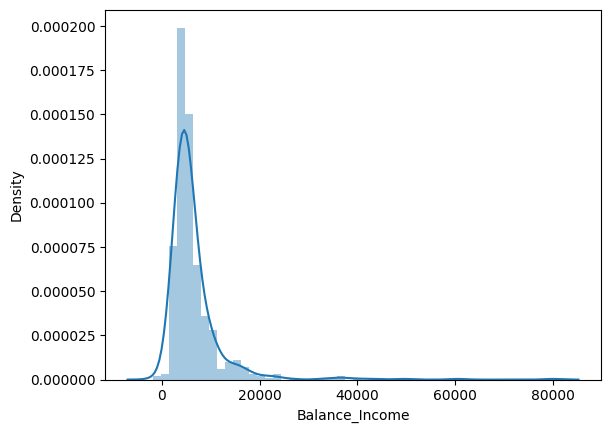

In [101]:
sns.distplot(train.Balance_Income)

In [105]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

C:\Users\Satyam Mishra\AppData\Local\Temp\ipykernel_24228\210972610.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=train.drop('Loan_Status',1)
